# Data Cleaning and Preprocessing

**Goal**: Clean salary data, create categories, and prepare text features

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

print('✅ Libraries loaded!')

✅ Libraries loaded!


In [2]:
# Load data
df = pd.read_csv('data/Uncleaned_DS_jobs.csv')
print(f'Original shape: {df.shape}')
df.head()

Original shape: (672, 15)


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


## Step 1: Clean Salary Data

In [3]:
# Function to extract average salary from text
def extract_salary(salary_str):
    if pd.isna(salary_str) or salary_str == '-1':
        return np.nan
    
    # Extract numbers (e.g., '137K-171K' -> [137, 171])
    numbers = re.findall(r'(\d+)K', str(salary_str))
    
    if len(numbers) >= 2:
        min_sal = int(numbers[0]) * 1000
        max_sal = int(numbers[1]) * 1000
        avg_sal = (min_sal + max_sal) / 2
        return avg_sal
    return np.nan

# Apply the function
df['salary_avg'] = df['Salary Estimate'].apply(extract_salary)

print(f'Salaries extracted: {df["salary_avg"].notna().sum()} out of {len(df)}')
print(f'\nSalary range: ${df["salary_avg"].min():,.0f} - ${df["salary_avg"].max():,.0f}')
df[['Salary Estimate', 'salary_avg']].head(10)

Salaries extracted: 672 out of 672

Salary range: $43,500 - $271,500


,Salary Estimate,salary_avg
0,$137K-$171K (Glassdoor est.),154000.0
1,$137K-$171K (Glassdoor est.),154000.0
2,$137K-$171K (Glassdoor est.),154000.0
3,$137K-$171K (Glassdoor est.),154000.0
4,$137K-$171K (Glassdoor est.),154000.0
5,$137K-$171K (Glassdoor est.),154000.0
6,$137K-$171K (Glassdoor est.),154000.0
7,$137K-$171K (Glassdoor est.),154000.0
8,$137K-$171K (Glassdoor est.),154000.0
9,$137K-$171K (Glassdoor est.),154000.0


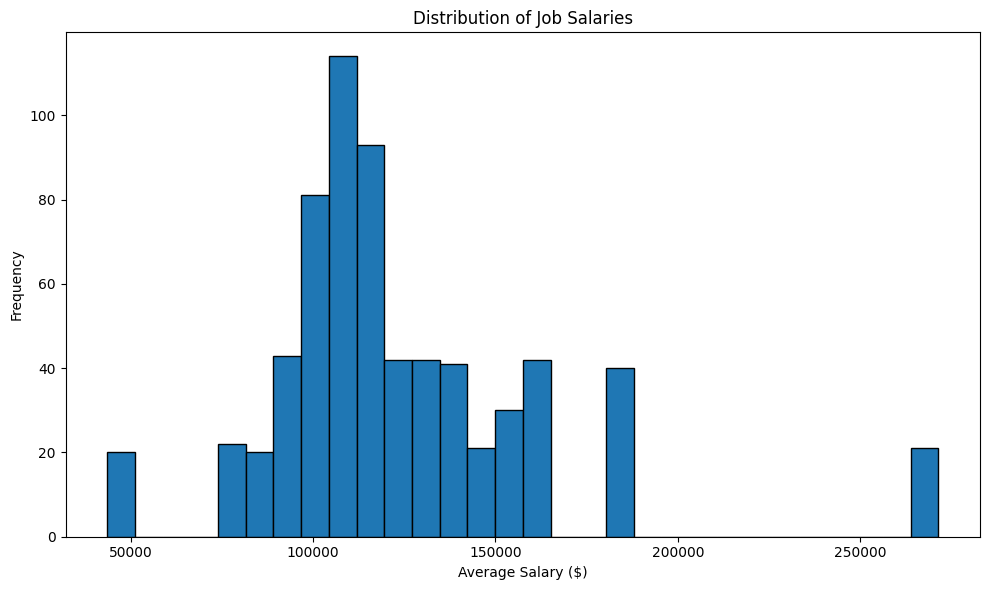

Mean salary: $123,664
Median salary: $114,000


In [4]:
# Visualize salary distribution
plt.figure(figsize=(10, 6))
plt.hist(df['salary_avg'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Average Salary ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Job Salaries')
plt.tight_layout()
plt.show()

print(f'Mean salary: ${df["salary_avg"].mean():,.0f}')
print(f'Median salary: ${df["salary_avg"].median():,.0f}')

## Step 2: Create Salary Range Categories

In [5]:
# Define salary ranges using quantiles (33rd and 66th percentiles)
low_threshold = df['salary_avg'].quantile(0.33)
high_threshold = df['salary_avg'].quantile(0.66)

print(f'Low range: < ${low_threshold:,.0f}')
print(f'Medium range: ${low_threshold:,.0f} - ${high_threshold:,.0f}')
print(f'High range: > ${high_threshold:,.0f}')

def categorize_salary(salary):
    if pd.isna(salary):
        return np.nan
    elif salary < low_threshold:
        return 'Low'
    elif salary < high_threshold:
        return 'Medium'
    else:
        return 'High'

df['salary_category'] = df['salary_avg'].apply(categorize_salary)

print('\nCategory distribution:')
print(df['salary_category'].value_counts())

Low range: < $106,000
Medium range: $106,000 - $133,000
High range: > $133,000

Category distribution:
salary_category
High      237
Low       218
Medium    217
Name: count, dtype: int64


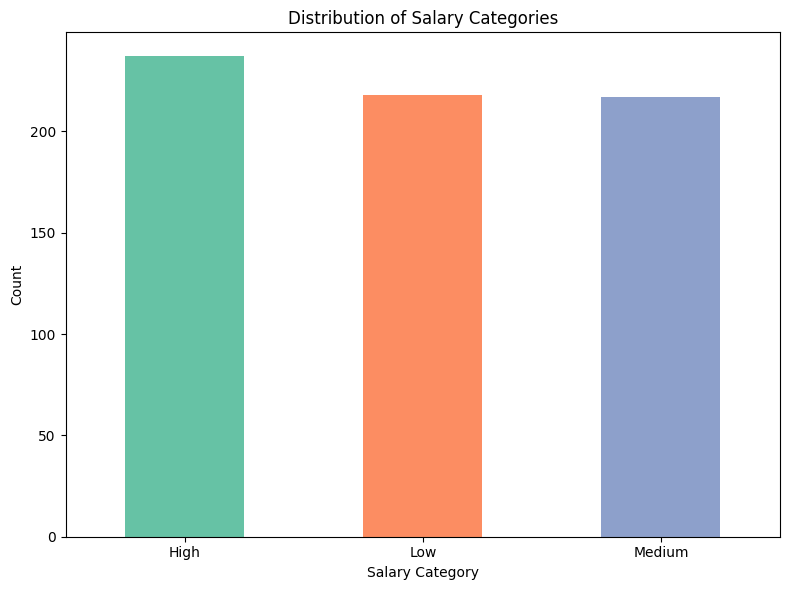

In [6]:
# Visualize categories
plt.figure(figsize=(8, 6))
df['salary_category'].value_counts().plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.xlabel('Salary Category')
plt.ylabel('Count')
plt.title('Distribution of Salary Categories')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Step 3: Clean Text Data

In [7]:
# Function to clean text
def clean_text(text):
    if pd.isna(text):
        return ''
    # Convert to lowercase
    text = str(text).lower()
    # Remove special characters but keep spaces
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    # Remove extra spaces
    text = ' '.join(text.split())
    return text

# Clean job titles
df['job_title_clean'] = df['Job Title'].apply(clean_text)

# Clean job descriptions
df['job_description_clean'] = df['Job Description'].apply(clean_text)

print('✅ Text cleaning complete!')
print('\nSample cleaned job title:')
print(f'Original: {df["Job Title"].iloc[0]}')
print(f'Cleaned: {df["job_title_clean"].iloc[0]}')

✅ Text cleaning complete!

Sample cleaned job title:
Original: Sr Data Scientist
Cleaned: sr data scientist


## Step 4: Create Final Dataset

In [8]:
# Remove rows with missing salary categories
df_clean = df[df['salary_category'].notna()].copy()

# Select only the columns we need
df_final = df_clean[['job_title_clean', 'job_description_clean', 'salary_category']].copy()

print(f'Final dataset shape: {df_final.shape}')
print(f'\nClass distribution:')
print(df_final['salary_category'].value_counts())

df_final.head()

Final dataset shape: (672, 3)

Class distribution:
salary_category
High      237
Low       218
Medium    217
Name: count, dtype: int64


,job_title_clean,job_description_clean,salary_category
0,sr data scientist,description the senior data scientist is respo...,High
1,data scientist,secure our nation ignite your future join the ...,High
2,data scientist,overview analysis group is one of the largest ...,High
3,data scientist,job description do you have a passion for data...,High
4,data scientist,data scientist affinity solutions marketing cl...,High


In [9]:
# Save the cleaned dataset
df_final.to_csv('data/cleaned_jobs.csv', index=False)
print('✅ Cleaned dataset saved to data/cleaned_jobs.csv')

✅ Cleaned dataset saved to data/cleaned_jobs.csv


In [10]:
# Summary statistics
print('=== DATA PREPROCESSING SUMMARY ===')
print(f'Original records: 672')
print(f'Final records: {len(df_final)}')
print(f'Features: 2 (job title + description)')
print(f'Target classes: 3 (Low, Medium, High)')
print('\nReady for model training! ✅')

=== DATA PREPROCESSING SUMMARY ===
Original records: 672
Final records: 672
Features: 2 (job title + description)
Target classes: 3 (Low, Medium, High)

Ready for model training! ✅
